<a id='home'></a>
# Project 3: Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [1. Data Processing](#processing)
- [2. Data Cleaning](#cleaning)
    - [Part I - Probability](#probability)
    - [Part II - A/B Test](#ab_test)
    - [Part III - Regression](#regression)
- [3. Data Analysis & Visualisation](#analysis)
- [4. Conclusions](#conclusion)


<a id='intro'></a>
### Introduction

In this submission I will be investigating the results of an A/B test run by a fictional e-commerce site.  

The factors explored are highlighted below from the Udacity instructions:

'For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.'




<a id='processing'></a>
## 1. DATA PROCESSING


<a id='probability'></a>
> ### Part I - Probability

In [3]:
# Step 1 - import relevant libraries into Jupyter Notebooks, provided by Udacity
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42) # as recommedned by Udacity

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

***A. Read in the dataset and take a look at the top few rows here:***

In [4]:
# Step 2 - import ('read in') AB dataset into Jupyter Notebooks for first 10 rows
df_AB = pd.read_csv("UD-P3_Analyse_AB_Test_Results_AB-Data_v0.1.csv")
df_AB.head(10)


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


***B. Use the cell below to find the number of rows in the dataset.***

In [5]:
# Step 3 - A/B dataset: returns a tuple of the dimensions of the data (outputs no of columns vs rows)
print(df_AB.shape)


(294478, 5)


*Comment:*
> There are **294,478** rows in this dataset


***C. The number of unique users in the dataset.***

In [6]:
# Step 4 - A/B dataset: returns the number of unique values in each column 
df_AB.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

*Comment:*
> There are **290,584** unique user id's however there are 294,478 rows for 'timestamp', this indicates to me that some users are accessing the site more than once.


In [7]:
# Step 5 - returns id numbers and name of columns
for i, v in enumerate(df_AB.columns):
    print(i, v)

0 user_id
1 timestamp
2 group
3 landing_page
4 converted


In [8]:
# Step 6 - returns breakdown of the data types within the dataset and any anomalies i.e. int, string, any null values)
df_AB.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


*Comments:*
>`timestamp` is assigned as an object type, as this column contains date I will convert it to a datetime type function.

In [9]:
# Step 7 - returns list of rows where all the data in row is the same
sum(df_AB.duplicated())

0

In [10]:
# Step 8 - returns statistics data summary (describes full breakdown of data into
# count, mean, Std Dev, percentile etc)
df_AB.describe()


,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


***D. The proportion of users converted.***

In [68]:
# Define variables and print shape of users converted 
conv = df_AB.converted == '1'
not_conv = df_AB.converted == '0'


C:\Users\byron\anaconda3\envs\Bs_Data_Analytics\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [12]:
# Number of users who are converted
print (len(df_AB[df_AB['converted']== 1]))
print (df_AB.shape[0])

35237
294478


*Comment:*
> The number of users who look to have converted is **35,327**.

In [13]:
# Proportion of users who are converted
(len(df_AB[df_AB['converted']==1]))/df_AB.shape[0]


0.11965919355605512

*Comment:*

>**12%** of users seem to have converted

***E. The number of times the `new_page` and `treatment` don't line up.***

In [14]:
# Query the difference between those pages where treatment does not equal new_page

treat_a = df_AB.query("group=='treatment' and landing_page =='old_page'").shape[0]
control_a = df_AB.query("group=='control' and landing_page =='new_page'").shape[0]

treat_a + control_a

3893

*Comment:*
>There is a difference of **3,893** pages where `treatment` does not equal `new_page`

***F. Do any of the rows have missing values?***

In [15]:
# Step 9 - returns True or False if there are any missing data   
# ** I found this message via Towrads Data Science on Medium, it was published by Benedikt Droste Link >> https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345 **

df_AB.isna().any().any()

False

In [16]:
# Step 10 - sums the total of missing data cells

df_AB.isna().sum().sum()

0

*Comment:*
>None of the rows have missing values

<ul>
<li><a href="#home">Go to beginning </a></li>
</ul>   

<a id='cleaning'></a>
## 2. DATA CLEANING

In [17]:
# Action: convert `timestamp` to the datetime dtype
df_AB.timestamp=pd.to_datetime(df_AB.timestamp)
df_AB.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   timestamp     294478 non-null  datetime64[ns]
 2   group         294478 non-null  object        
 3   landing_page  294478 non-null  object        
 4   converted     294478 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  
a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

***a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2***.

In [18]:
# Create a new dataframe (v2) in preparation for a modfied dataset

df_AB_2 = pd.read_csv("UD-P3_Analyse_AB_Test_Results_AB-Data_v0.1.csv")
df_AB_2.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [19]:
# ACTION: convert `timestamp` in dataframe AB_2 to the datetime dtype
df_AB.timestamp=pd.to_datetime(df_AB.timestamp)
df_AB.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  int64         
 1   timestamp     294478 non-null  datetime64[ns]
 2   group         294478 non-null  object        
 3   landing_page  294478 non-null  object        
 4   converted     294478 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.2+ MB


In [20]:
# Remove the rows where treatment is not aligned with new_page or control is not aligned 
# with old_page as can't be sure of accuracy 

df_AB_2 = df_AB.query("group == 'control' and landing_page == 'old_page'")
df_AB_2 = df_AB_2.append(df_AB.query("group == 'treatment' and landing_page == 'new_page'"))



In [21]:
# Returns the new dimensions of the new dataframe (outputs no of columns vs rows)

print(df_AB_2.shape)

(290585, 5)


In [22]:
# Double Check all of the correct rows were removed - this should be 0
df_AB_2[((df_AB_2['group'] == 'treatment') == (df_AB_2['landing_page'] == 'new_page')) == False].shape[0]

0

In [23]:
df_AB_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       290585 non-null  int64         
 1   timestamp     290585 non-null  datetime64[ns]
 2   group         290585 non-null  object        
 3   landing_page  290585 non-null  object        
 4   converted     290585 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 13.3+ MB


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

***a. How many unique **user_id**s are in **df2**?***

In [24]:
# Returns unqiue ID's for df_AB_2

df_AB_2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

*Comment:* 
>There are **290,584** unique user ID's for dataset of A/B 2

***b. There is one user_id repeated in df2. What is it?***

In [25]:
# Returns confirmation that there is one repeated user ID in df_AB_2

repeat_ID = sum(df_AB_2["user_id"].duplicated())
print(repeat_ID)


1


In [26]:
# Returns the repeated user ID in df_AB_2

df_AB_2[df_AB_2['user_id'].duplicated()]


,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


*Comment:* 
>The repeated user_id is **773192**

***c. What is the row information for the repeat **user_id**?***

In [27]:
# Returns the row information for the repeated user IDs in df_AB_2

df_AB_2[df_AB_2['user_id'] == 773192]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**

In [28]:
# Removes the second row [2893] from the df_AB_2 dataframe

df_AB_2 = df_AB_2.drop_duplicates(subset='user_id', keep='first')

In [29]:
# Should return zero to confirm that the duplicate row [2893] has been deleted, should only have 1899 now
repeat_ID = sum(df_AB_2["user_id"].duplicated())
print(repeat_ID)


0


In [30]:
# Check that id [1899] is remaining with `user ID` 773192
df_AB_2[df_AB_2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


<ul>
<li><a href="#home">Go to beginning </a></li>
</ul>   

<a id='analysis'></a>
## 3. DATA ANALYSIS & VISUALISATION

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

***a. What is the probability of an individual converting regardless of the page they receive?***

In [31]:
# Probalbility of an individual converting regardless of page they receive
df_AB_2.converted.mean()

0.11959708724499628

*Comment:*
>The probability of an individual converting regardless of page is **11.9%**.

***b. Given that an individual was in the `control` group, what is the probability they converted?***

In [32]:
# Probablity of an individual in control group being converted
prob_cont = df_AB_2.query("group == 'control'")['converted'].mean()
prob_cont

0.1203863045004612

*Comment:*
>The probability that an individual in the `control` group converted is **12%**.

***c. Given that an individual was in the `treatment` group, what is the probability they converted?***

In [33]:
# Probability of an individual in treatment group being converted
prob_treat = df_AB_2.query("group == 'treatment'")['converted'].mean()
prob_treat

0.11880806551510564

*Comment:*
>The probability that an individual in the `treatment` group converted is **11.8%**.

***d. What is the probability that an individual received the new page?***

In [34]:
# Probability of an individual receving the new page
df_AB_2.query('landing_page == "new_page"').shape[0]/df_AB_2.shape[0]


0.5000619442226688

*Comment:*
>The probability that an individual received the new page is **50%.**

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

*Answer to [**e**]:*
> Taking into account the results from a) to d) the evidence does not overwhelmingly indicate that the new treatment page leads to more conversions.    The conversion rates for a) to c) are all relatively low and similar at 11.9%, 12% and 11.8%  respectively which does not indicate a strong correlation to the changes. 


<ul>
<li><a href="#home">Go to beginning </a></li>
</ul>   

<a id='ab_test'></a>
> ### Part II - A/B Test

**NOTE:**
Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Hypothesis 0** - *Old_Page* equal to *New_Page*

**Hypothesis 1** - *New_Page* is greater than *Old_Page*


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

***a. What is the **convert rate** for $p_{new}$ under the null?***

In [35]:
# Conversion rate new_page under the null
new_p_null = df_AB_2['converted'].mean()
new_p_null

0.11959708724499628

*Comment:*
>The convert rate for a new page under the null is **11.9%**.

***b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [36]:
# Conversion rate old_page under the null

new_p_null  # using this as notes stated that Pnew and Pold are equal

0.11959708724499628

*Comment:*
>The convert rate for an old page under the null is **11.9%**.

c. What is $n_{new}$?

In [37]:
# Returns total number of users who have converted to new pages 

n_new_page = df_AB_2.query("landing_page == 'new_page'").shape[0]
n_new_page

145310

*Comment:*
>The total number of individuals who have converted to new pages is **145,310**.

d. What is $n_{old}$?

In [38]:
# Returns total number of individuals who did not convert - stayed on old page

n_old_page = df_AB_2.query("landing_page == 'old_page'").shape[0]
n_old_page

145274

*Comment:* 
>The total number of individuals who did not convert is **145,274**.

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [39]:
# Define variables transaction simulation in new page converted

new_pg_converted = np.random.binomial(1, new_p_null, n_new_page)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [40]:
# Define variables transaction simulation in old page converted

old_pg_converted = np.random.binomial(1, new_p_null, n_old_page)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [41]:
# Returns the value (new page minus old page) from simulated transactions of new and old page converted in [e] and [f]

new_pg_converted.mean() - old_pg_converted.mean() 

0.00031433661240948263

*Comment:*
>The convert rate of simulated transactions of converted new & old pages is **0.001%**.

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [42]:
# Define variables for creating 10,000 simulation new and old page values

p_diffs = [] 
converted_new_sim = np.random.binomial(n_new_page, new_p_null, 10000)/n_new_page
converted_old_sim = np.random.binomial(n_old_page, new_p_null, 10000)/n_old_page
p_diffs = converted_new_sim - converted_old_sim

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

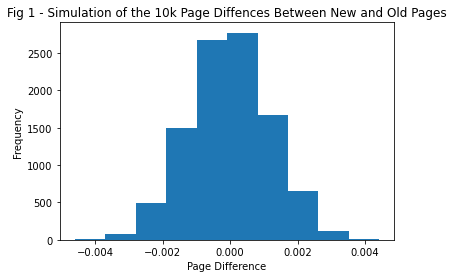

In [43]:
# Returns histogram of the page differences (p_diffs)  

plt.hist(p_diffs)
plt.title("Fig 1 - Simulation of the 10k Page Diffences Between New and Old Pages")
plt.xlabel('Page Difference')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

0.19890000000000002


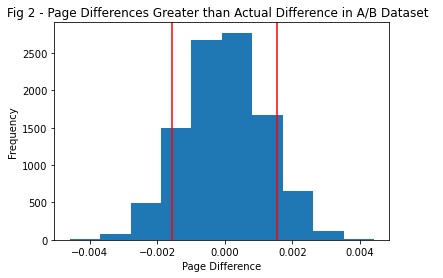

In [44]:
# Proportion of page differnces (p_diffs) greater than actual difference in orig A/B dataset

diff_obsd = prob_treat - prob_cont

low_prob = (p_diffs < diff_obsd).mean()
high_prob = (p_diffs.mean() + (p_diffs.mean() - diff_obsd) < p_diffs).mean()

plt.hist(p_diffs);
plt.title("Fig 2 - Page Differences Greater than Actual Difference in A/B Dataset  ")
plt.xlabel('Page Difference')
plt.ylabel('Frequency')
plt.axvline(diff_obsd, color='red');
plt.axvline(p_diffs.mean() + (p_diffs.mean() - diff_obsd), color='red');

p_val = low_prob + high_prob
print(p_val)

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

*Answer to [**k**]:*
> The computation in part [j] is the p-value which helps to ascertain how likely it is you would have received the sample results if the null hypothesis was true.
The p-value is **0.198**, used against the alpha critical reference value of [0.05] this p-value indicates weak evidence against the null hypothesis thereby you would **fail** to reject the hypothesis.  

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm



m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [46]:
# Define variables 

converted_old = df_AB_2.query("landing_page == 'old_page'")['converted'].sum()
converted_new = df_AB_2.query("landing_page == 'new_page'")['converted'].sum()

n_new = 145310
n_old = 145274

In [47]:
# Returns number of conversions for each page and the number of individuals who received each page

z_score, p_value = sm.stats.proportions_ztest([converted_old, converted_new], [n_old, n_new])
print(z_score, p_value)

1.3109241984234394 0.18988337448195103


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

*Answer to [**n**]:*

> The z-score and p-vale of **1.31** and **0.18** respectively tell us that the difference between the  conversion rates for the old and new pages is minimal which leads to the conclusion to fail to reject the Hypothesis.  The findings in [J] and [K]  back up this conclusion as the p-value of 0.19 is greater than the alpha critical value of 0.05.





<ul>
<li><a href="#home">Go to beginning </a></li>
</ul>   

<a id='regression'></a>
> ### Part III - A regression approach

**NOTE:**

`1.` In this final part, you will see that the result you achieved in the previous A/B test can also be achieved by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [48]:
# Create [intercept] and [ab_page] dummy variable columns

df_AB_2['intercept'] = 1
df_AB_2[['a_page', 'ab_page']] = pd.get_dummies(df_AB_2['group'])
df_AB_2 = df_AB_2.drop('a_page', axis=1)
df_AB_2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
15,644214,2017-01-22 02:05:21.719434,control,old_page,1,1,0
16,847721,2017-01-17 14:01:00.090575,control,old_page,0,1,0
18,650559,2017-01-24 11:55:51.084801,control,old_page,0,1,0
19,935734,2017-01-17 20:33:37.428378,control,old_page,0,1,0
25,746742,2017-01-23 11:38:29.592148,control,old_page,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [49]:
# Code used to import regression model via statsmodels

log_model = sm.Logit(df_AB_2['converted'], df_AB_2[['intercept', 'ab_page']])
model_result = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [50]:
# returns the summary

model_result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:               8.077e-06
Time:                        11:17:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

*Answer to [**e**]:*

> The p-value associated with `ab_page` is **0.190.**  This value differs from the one in Part II due to the fact that the  hypotheses are fundamentally different.   In part II we were looking at whether  differences in the pages be it greater or less for each Hypothesis whereas the regression result is based on whether the Hypothesis is equal or not.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

*Answer to [**f**]:*
> It is always a good idea to consider other factor as initial results are not always either conclusive or indeed correct.  By adding further factors it helps to solidify the conclusion one way or the other.
One thing to be awre of when adding terms into a regression model is Multicollinearity, this can happen when an independent variable is highly correlated with one or more of the other independent variables.  This can be an issues because it calls into question the validity of the other independent variable.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [51]:
# Imports the countries dataset

df_Ctry = pd.read_csv("UD-P3_Analyse_AB_Test_Results-Countries_v0.1.csv")
df_Ctry.head(10)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK
5,909908,UK
6,811617,US
7,938122,US
8,887018,US
9,820683,US


In [52]:
# Join the countries dataset to the existing A/B counties dataset (v2)

df_AB_2 = df_Ctry.set_index('user_id').join(df_AB_2.set_index('user_id'), how='inner')

In [66]:
# Create the three dummy variables
df_AB_2[['CA', 'UK', 'US']] = pd.get_dummies(df_AB_2['country'])

In [67]:
# Statistical output of merged datasets
log_model = sm.Logit(df_AB_2['converted'], df_AB_2[['intercept', 'ab_page', 'CA', 'UK',]])
model_result = log_model.fit()
model_result.summary()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        16:25:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

*Comment:*
> The p-value for the country are all greater than the critical value of 0.05 which further cements the view that we fail to reject the hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [64]:
# Create three additional columns and  summary results of the new model

df_AB_2['CA_page'] = df_AB_2['CA']*df_AB_2['ab_page']
df_AB_2['UK_page'] = df_AB_2['UK']*df_AB_2['ab_page']
df_AB_2['US_page'] = df_AB_2['US']*df_AB_2['ab_page']
logit_mod = sm.Logit(df_AB_2['converted'], df_AB_2[['intercept', 'CA_page', 'UK_page']])
model_result = log_model.fit()
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Aug 2020   Pseudo R-squ.:               2.323e-05
Time:                        16:23:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

<ul>
<li><a href="#home">Go to beginning </a></li>
</ul>   

<a id='conclusion'></a>
## 4. CONCLUSIONS

In this investigation we analysed the results of A/B testing carried out by an e-commerce site, the aim of which to have a view as to whether the company should implement  a new landing page, keep the old page or run the experiment longer.  

'For this project, you will be working to understand the results of an A/B test run by an e-commerce website. Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.  
Initially a Hypothesis test was conducted on  whether the  new landing page was equal to or greater than the old page in terms of converting users, the 12% conversion rate of individuals is not a significant figure built this in itself could not be a determining factor.   What is more telling from the test is the p-value score of **0.198**, this indicates weak evidence against the null hypothesis which therefore **fails** to reject the null hypothesis.

Further investigation of the Hypothesis led us to calculating the A/B test via a regression model, the result of which the p-value was a slightly different value at **0.191**, however this score still supports the notion that the new landing page did not significantly affect the conversion rate.
 
Finally we introduced adding countries to see what affect, if any, they would have on the conversion rate (mindful of Simpson's Paradox), the results of which indicated that countries do not have a significant affect on the conversion rate.  Based on all the analysis above I would advise that we do not have enough evidence to reject the null hypothesis and therefore the company does not have a compelling reason to switch to the new page as  the old one performs no worse.

### Attributation
I used the following resources in the completion of this project:
* **Benedikt Droste** | TowardsDataScience website | Link: https://towardsdatascience.com/how-to-check-for-missing-values-in-pandas-d2749e45a345
* **Deborah J. Rumsey** | Book: Statistics Essentials for Dummies
* **Stephanie Glen** | Statistics How To | Link: https://www.statisticshowto.com/probability-and-statistics/z-score/
* **Springer Link**  | The problem of multicollinearity | Link: https://link.springer.com/chapter/10.1007/978-0-585-25657-3_37

<ul>
<li><a href="#home"> ...END...  go to beginning </a></li>
</ul>    